In [1]:
import pandas as pd
import trappy

# XYPlot can plot data from various input formats
### From a list

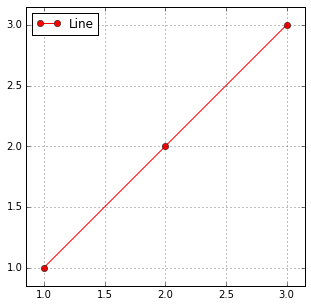

In [2]:
x = [1,2,3]
y = [1,2,3]
trappy.XYPlot(x, y, legend=["Line"]).view()

### Multiple lines from from lists

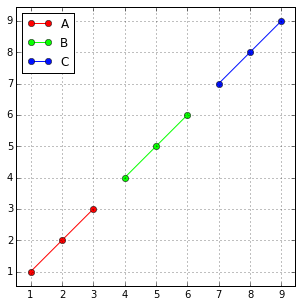

In [3]:
x = [[1,2,3], [4,5,6], [7,8,9]]
y = [[1,2,3], [4,5,6], [7,8,9]]
trappy.XYPlot(x, y, legend=["A", "B", "C"]).view()

### From dicts

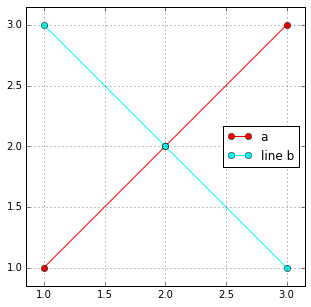

In [4]:
x = {"a": [1,2,3],
     "line b": [1,2,3]}

y = {"a": [1,2,3],
     "line b": [3,2,1]}

trappy.XYPlot(x, y).view()

### From a pandas dataframe

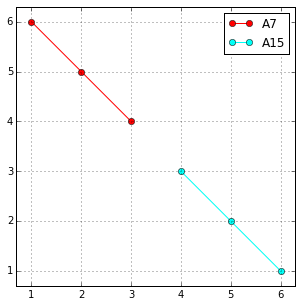

In [5]:
df = pd.DataFrame()
df["power"] = [6,5,4,3,2,1]
df["performance"] = [1,2,3,4,5,6]
df["core"] = ["A7", "A7", "A7", "A15", "A15", "A15"]
trappy.XYPlot(df, x_col="performance", y_col="power", legend_col="core").view()

# Error bars

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


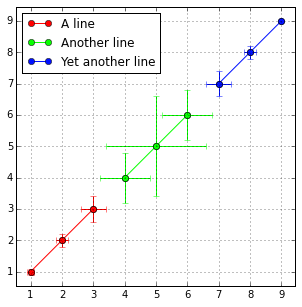

In [6]:
x = y = [[1,2,3], [4,5,6], [7,8,9]]
xerr = yerr = [[0.1,0.2,0.4], [0.8,1.6,0.8], [0.4,0.2,0.01]]
line_names = ['A line', 'Another line', 'Yet another line']
trappy.XYPlot(x, y, yerr=yerr, xerr=xerr, legend=line_names).view()

# Styling

### labels

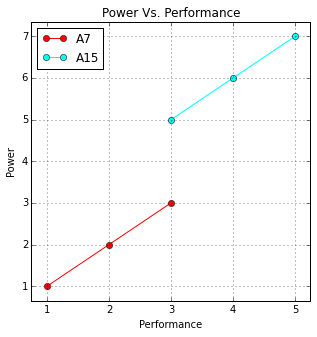

In [7]:
df = pd.DataFrame()
df["power"] = [1,2,3,5,6,7]
df["performance"] = [1,2,3,3,4,5]
df["core"] = ["A7", "A7", "A7", "A15", "A15", "A15"]
trappy.XYPlot(df, x_col="performance", y_col="power", legend_col="core",
              title="Power Vs. Performance",
              xlabel="Performance",
              xunit="DMIPS",
              ylabel="Power",
              yunit="W").view()

### Figure size

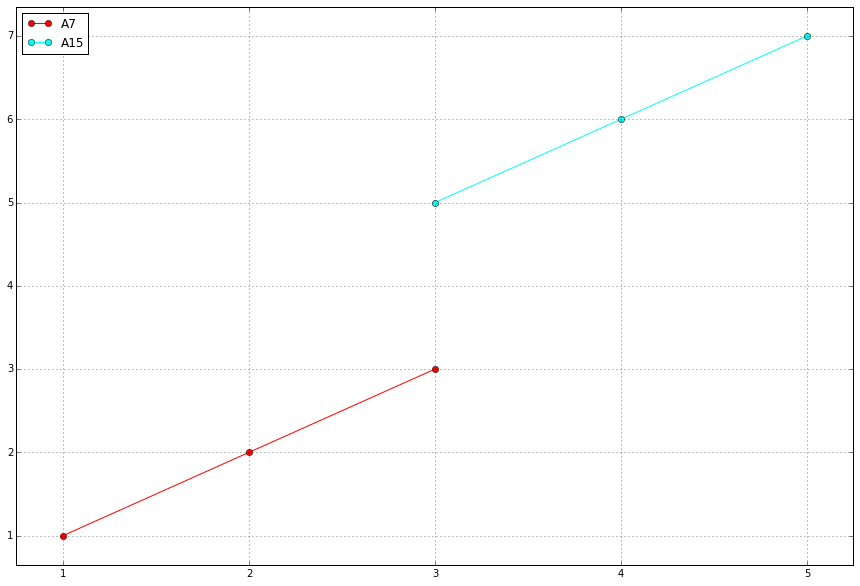

In [8]:
trappy.XYPlot(df, x_col="performance", y_col="power", legend_col="core",
              fig_size=(15,10)).view()

### Automatic line naming

If a legend is not specified lines will be give consecutive numeric names

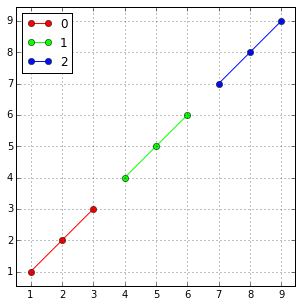

In [9]:
x = [[1,2,3], [4,5,6], [7,8,9]]
y = [[1,2,3], [4,5,6], [7,8,9]]
trappy.XYPlot(x, y).view()

# DualPlotNorm
This plotting class will plot two graphs side by side, one normal plot and one normalised to a percentage.

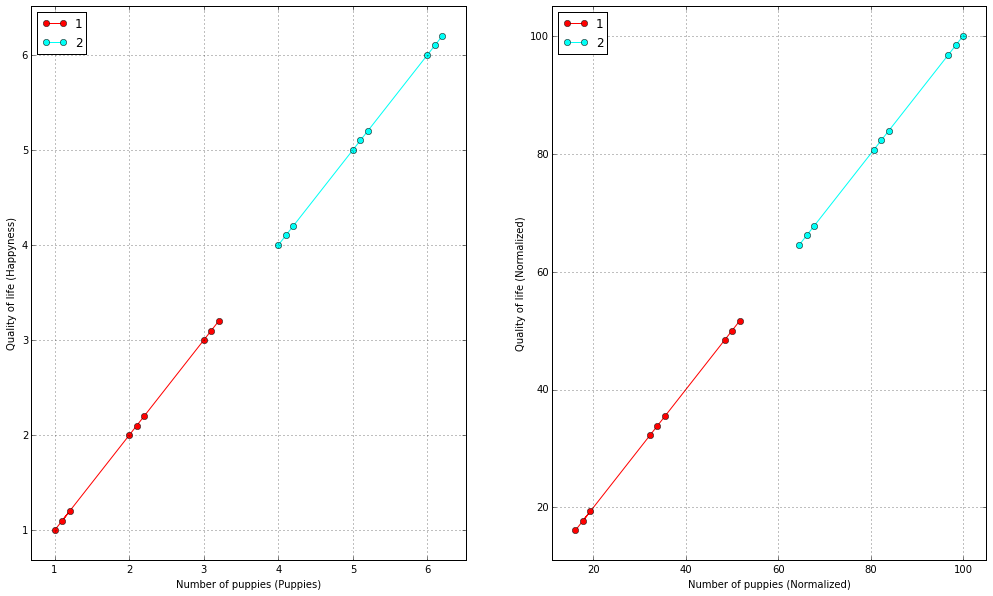

In [10]:
import pandas as pd
import trappy

df = pd.DataFrame()
df["x"] =     [1.0,1.2,1.1, 2.0,2.1,2.2, 3.0,3.1,3.2,   4.0,4.1,4.2, 5.0,5.1,5.2, 6.0,6.1,6.2]
df["y"] =     [1.0,1.2,1.1, 2.0,2.1,2.2, 3.0,3.1,3.2,   4.0,4.1,4.2, 5.0,5.1,5.2, 6.0,6.1,6.2]
df["line"] =  [1,  1,  1,   1,  1,  1,   1,  1,  1,     2,  2,  2,   2,  2,  2,   2,  2,  2]
trappy.DualPlotNorm(df, x_col="x", y_col="y", legend_col="line", 
                    xlabel="Number of puppies", ylabel="Quality of life",
                    xunit="Puppies", yunit="Happyness").view()

If a group column is specified, values with the same group and line will be averaged and the 95% confidence interval shown with error bars.

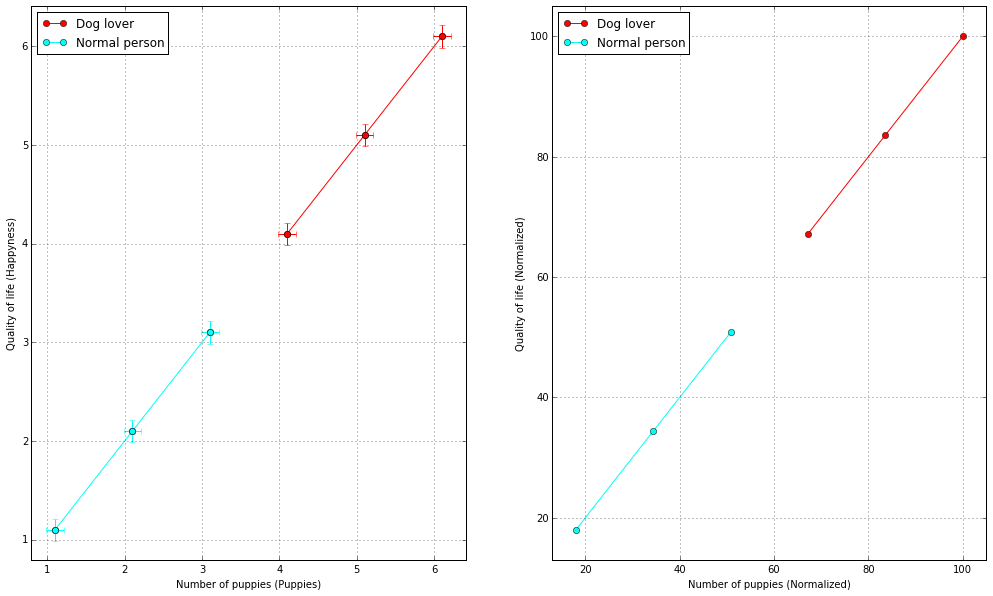

In [11]:
df["x"] =     [1.0,1.2,1.1, 2.0,2.1,2.2, 3.0,3.1,3.2,   4.0,4.1,4.2, 5.0,5.1,5.2, 6.0,6.1,6.2]
df["y"] =     [1.0,1.2,1.1, 2.0,2.1,2.2, 3.0,3.1,3.2,   4.0,4.1,4.2, 5.0,5.1,5.2, 6.0,6.1,6.2]
df["group"] = [1,  1,  1,   2,  2,  2,   3,  3,  3,     1,  1,  1,   2,  2,  2,   3,  3,  3]
df["line"] =  ["Normal person"]*9                     + ["Dog lover"]*9
  
trappy.DualPlotNorm(df, x_col="x", y_col="y", legend_col="line", group_col="group", 
                    xlabel="Number of puppies", ylabel="Quality of life",
                    xunit="Puppies", yunit="Happyness").view()

If sepatate images are required for each plot you can set separate_plots=True like so:

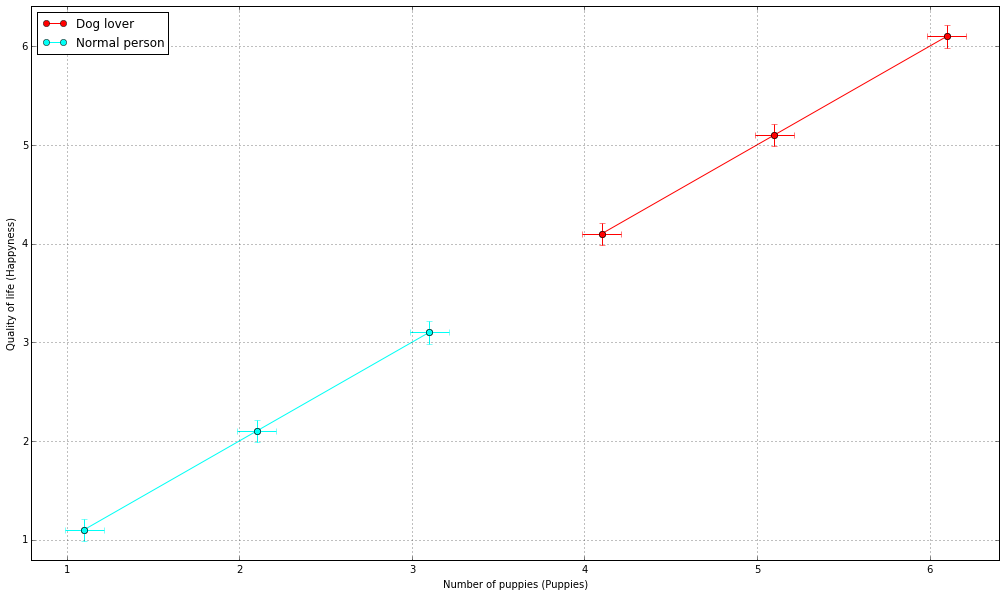

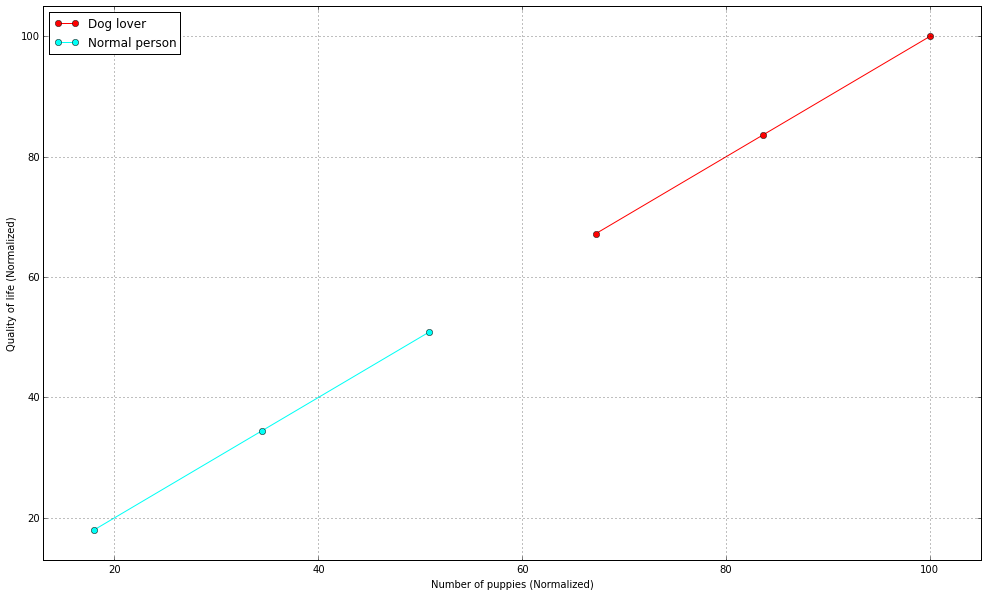

In [12]:
trappy.DualPlotNorm(df, x_col="x", y_col="y", legend_col="line", group_col="group", 
                    xlabel="Number of puppies", ylabel="Quality of life",
                    xunit="Puppies", yunit="Happyness", separate_plots=True).view()

# PowerPerfPlot

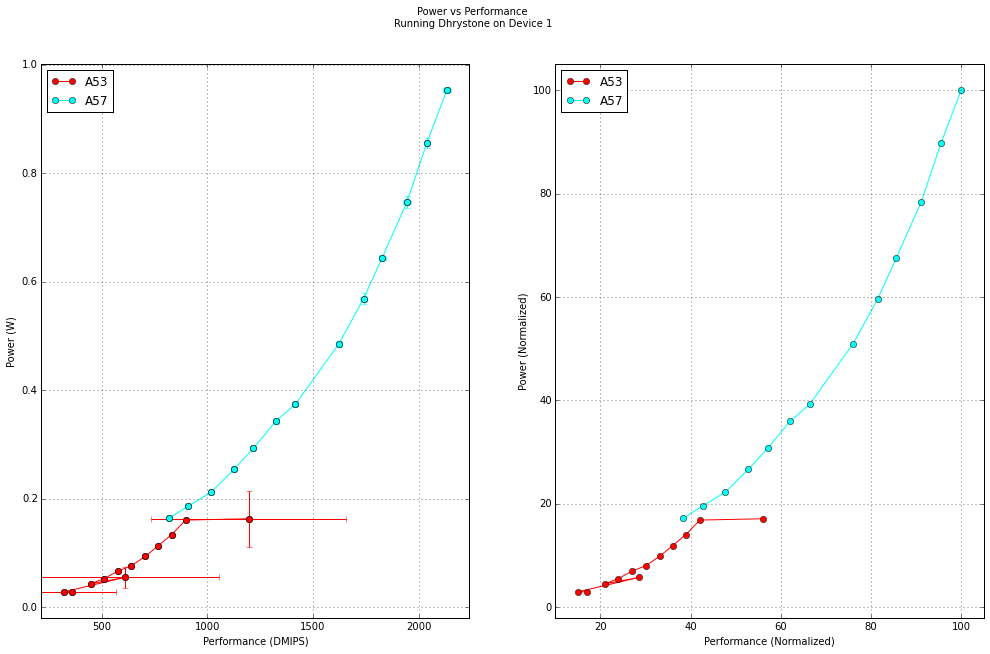

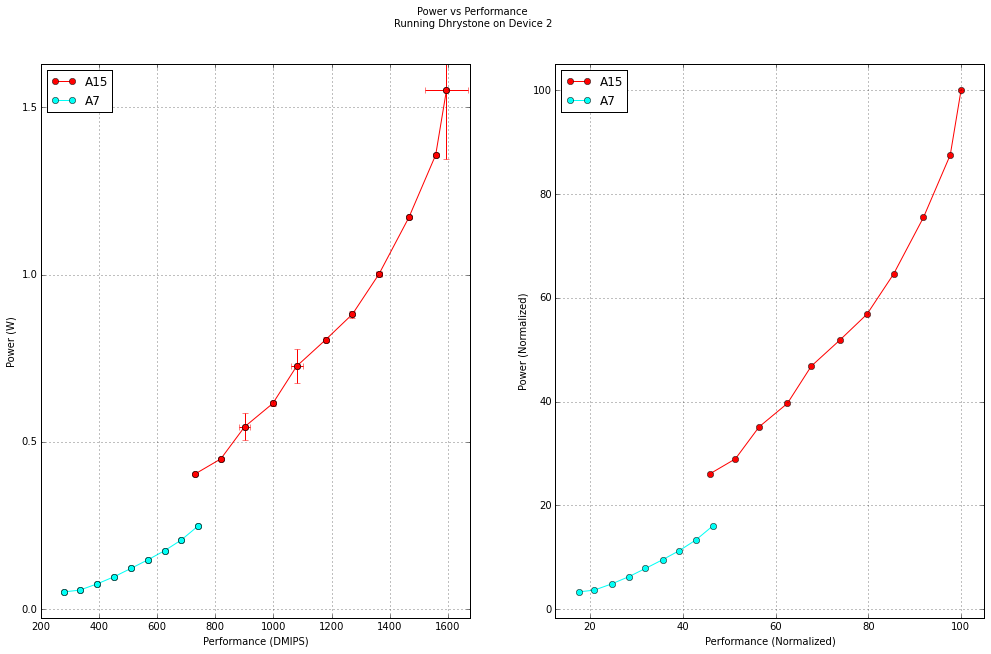

In [3]:
import pandas as pd
import trappy

a = trappy.PowerPerfPlot(["PowerPerfPlot_examples/A1",
                          "PowerPerfPlot_examples/A2"],
                         "Dhrystone", "Device 1")
# You can do some adjustments now
a.runs = a.runs.replace('A7', 'A53')
a.runs = a.runs.replace('A15', 'A57')
a.view()


# if you need to adjust raw csv input you can do:
b = trappy.plotter.PowerPerfPlot.PowerPerfPlot("PowerPerfPlot_examples/B/", 
                                               "Dhrystone", "Device 2", process=False)
#Fix incorrect DAQ channel naming
b.runs = b.runs.replace("A7_power", "temp")
b.runs = b.runs.replace("A15a_power", "A7_power")
b.runs = b.runs.replace("A15b_power", "A15a_power")
b.runs = b.runs.replace("temp", "A15b_power")
#remove outliers
b.runs = b.runs[~((b.runs.core=="A15") & (b.runs.freq==1900000))]
b._process()
b.view()